# International E-commerce EDA
This notebook provides a robust workflow to load, diagnose, and visualize international e-commerce data.

## 1. Import Required Libraries
Import all necessary libraries for data manipulation and visualization.

In [1]:
# Imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

## 2. Define Paths and Check Files
Set the path for the data file and check if it exists before loading.

In [2]:
# Define data path and check file existence
data_dir = Path('../data/')
file_ecommerce = data_dir / 'E-commerce Dataset.csv'
def check_file_exists(filepath):
    exists = os.path.exists(filepath)
    print(f"File '{filepath}': {'FOUND' if exists else 'NOT FOUND'}")
    return exists
check_file_exists(file_ecommerce)

File '..\data\E-commerce Dataset.csv': FOUND


True

## 3. Load E-commerce Dataset
Load the CSV file into a DataFrame with robust error handling.

In [3]:
# Load E-commerce Dataset
ecommerce_df = None
try:
    ecommerce_df = pd.read_csv(file_ecommerce, low_memory=False)
    print("E-commerce Dataset loaded successfully.")
    print(f"Shape: {ecommerce_df.shape}")
except Exception as e:
    print(f"Error loading E-commerce Dataset: {e}")

E-commerce Dataset loaded successfully.
Shape: (51290, 16)


## 4. Initial DataFrame Diagnostics
Show shape, columns, and first rows to confirm successful loading.

In [4]:
# Diagnostics: shape, columns, head
if ecommerce_df is not None:
    print('Shape:', ecommerce_df.shape)
    print('Columns:', list(ecommerce_df.columns))
    display(ecommerce_df.head())
else:
    print('ecommerce_df is NOT loaded. Check the file path and name.')

Shape: (51290, 16)
Columns: ['Order_Date', 'Time', 'Aging', 'Customer_Id', 'Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority', 'Payment_method']


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


## 5. Data Quality Check
Check for missing values, data types, duplicates, and basic statistics.

In [5]:
# Data quality check
if ecommerce_df is not None:
    print('Missing values per column:')
    print(ecommerce_df.isnull().sum())
    print('\nData types:')
    print(ecommerce_df.dtypes)
    print('\nDuplicate rows:', ecommerce_df.duplicated().sum())
    print('\nBasic statistics:')
    print(ecommerce_df.describe())
else:
    print('ecommerce_df is NOT loaded.')

Missing values per column:
Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
dtype: int64

Data types:
Order_Date              object
Time                    object
Aging                  float64
Customer_Id              int64
Gender                  object
Device_Type             object
Customer_Login_type     object
Product_Category        object
Product                 object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
Shipping_Cost          float64
Order_Priority          object
Payment_method          object
dtype: object

Duplicate rows: 0

Basic statistics:

## 6. Check Essential Columns
Confirm that all required columns for analysis and visualization are present.

In [6]:
# Check for essential columns
required_columns = ['Sales', 'Gender', 'Product_Category', 'Order_Date', 'Ship_Date']
if ecommerce_df is not None:
    missing = [col for col in required_columns if col not in ecommerce_df.columns]
    if missing:
        print(f"Missing columns: {missing}")
    else:
        print("All required columns are present.")
else:
    print('ecommerce_df is NOT loaded.')

Missing columns: ['Ship_Date']


## 7. Simple Exploratory Visualizations
Create basic plots to validate data structure and content.

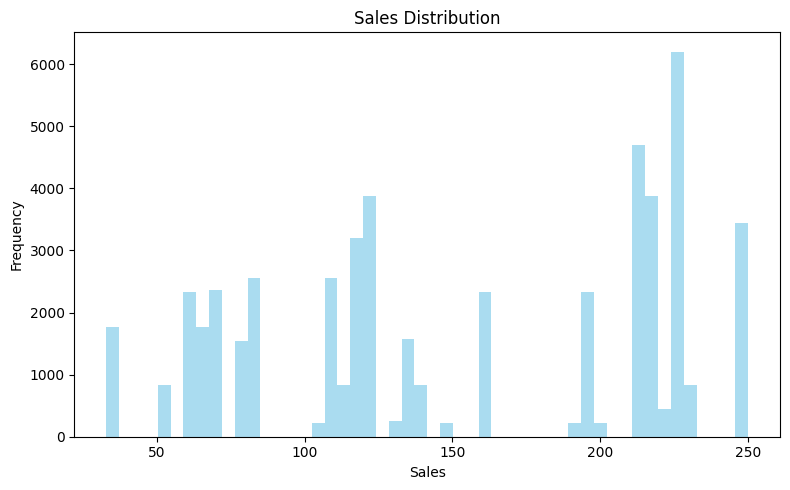

In [7]:
# Sales histogram
if ecommerce_df is not None and 'Sales' in ecommerce_df.columns:
    plt.figure(figsize=(8,5))
    plt.hist(ecommerce_df['Sales'].dropna(), bins=50, color='skyblue', alpha=0.7)
    plt.title('Sales Distribution')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print('Sales column not found or dataframe not loaded.')

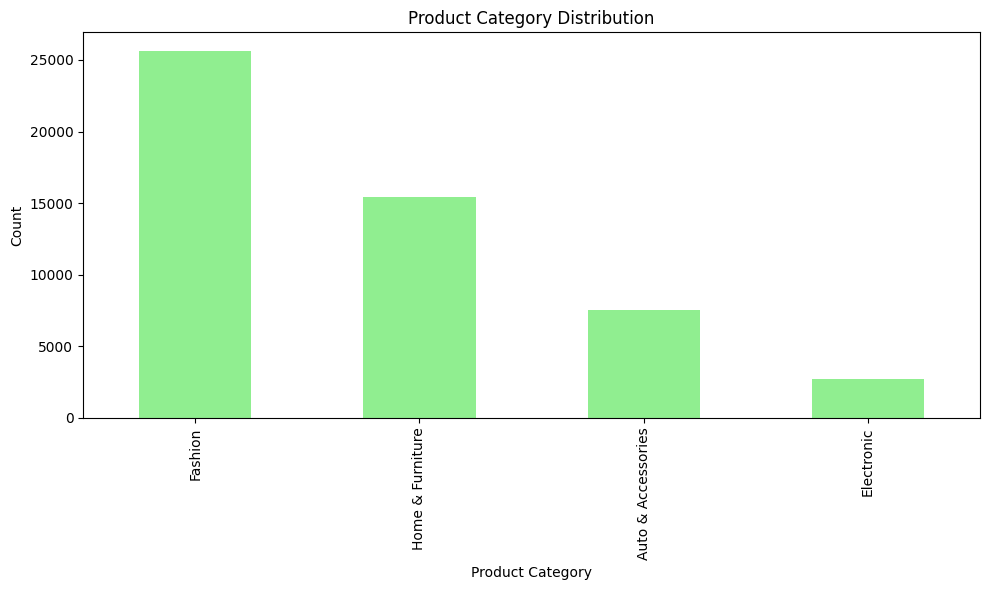

In [8]:
# Product category distribution
if ecommerce_df is not None and 'Product_Category' in ecommerce_df.columns:
    plt.figure(figsize=(10,6))
    ecommerce_df['Product_Category'].value_counts().plot(kind='bar', color='lightgreen')
    plt.title('Product Category Distribution')
    plt.xlabel('Product Category')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print('Product_Category column not found or dataframe not loaded.')

## 8. Export Visualizations as PNG
Save each plot as a PNG file in the /results_png/ directory for reproducibility.

In [ ]:
# Ensure results_png directory exists
results_png_dir = Path('../results_png/')
if not results_png_dir.exists():
    results_png_dir.mkdir(parents=True)
    print(f"Created directory: {results_png_dir}")
else:
    print(f"Directory already exists: {results_png_dir}")

In [ ]:
# Export sales histogram as PNG
if ecommerce_df is not None and 'Sales' in ecommerce_df.columns:
    fig, ax = plt.subplots(figsize=(8,5))
    ax.hist(ecommerce_df['Sales'].dropna(), bins=50, color='skyblue', alpha=0.7)
    ax.set_title('Sales Distribution')
    ax.set_xlabel('Sales')
    ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    fig.savefig(results_png_dir / 'sales_distribution.png', dpi=300)
else:
    print('Sales column not found or dataframe not loaded.')

In [ ]:
# Export product category distribution as PNG
if ecommerce_df is not None and 'Product_Category' in ecommerce_df.columns:
    fig, ax = plt.subplots(figsize=(10,6))
    ecommerce_df['Product_Category'].value_counts().plot(kind='bar', color='lightgreen', ax=ax)
    ax.set_title('Product Category Distribution')
    ax.set_xlabel('Product Category')
    ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()
    fig.savefig(results_png_dir / 'product_category_distribution.png', dpi=300)
else:
    print('Product_Category column not found or dataframe not loaded.')